In [13]:
import pandas as pd
import os
# Ensure the 'graphs/' directory exists
os.makedirs('graphs', exist_ok=True)

graph_type = 'qft_lookahead'

# Load the data from the CSV file
data = pd.read_csv(f"experiments/{graph_type}.csv")

In [14]:


# Convert relevant columns to numeric types
data['avg_runtime'] = pd.to_numeric(data['avg_runtime'])
data['avg_swap_count'] = pd.to_numeric(data['avg_swap_count'])
data['avg_depth'] = pd.to_numeric(data['avg_depth'])


In [15]:


# Group the data by 'num_qubits' and 'layout_trials', selecting only numeric columns
grouped_data = data.groupby(['num_qubits', 'layout_trials'])[['avg_runtime', 'avg_swap_count', 'avg_depth']].mean().reset_index()

# Extract unique values for layout_trials and num_qubits
layout_trials = grouped_data['layout_trials'].unique()
num_qubits = grouped_data['num_qubits'].unique()

# Create dictionaries to store data for each qubit count
swap_counts = {q: [] for q in num_qubits}
runtimes = {q: [] for q in num_qubits}
depths = {q: [] for q in num_qubits}

# Populate the dictionaries
for q in num_qubits:
    swap_counts[q] = grouped_data[grouped_data['num_qubits'] == q]['avg_swap_count'].tolist()
    runtimes[q] = grouped_data[grouped_data['num_qubits'] == q]['avg_runtime'].tolist()
    depths[q] = grouped_data[grouped_data['num_qubits'] == q]['avg_depth'].tolist()


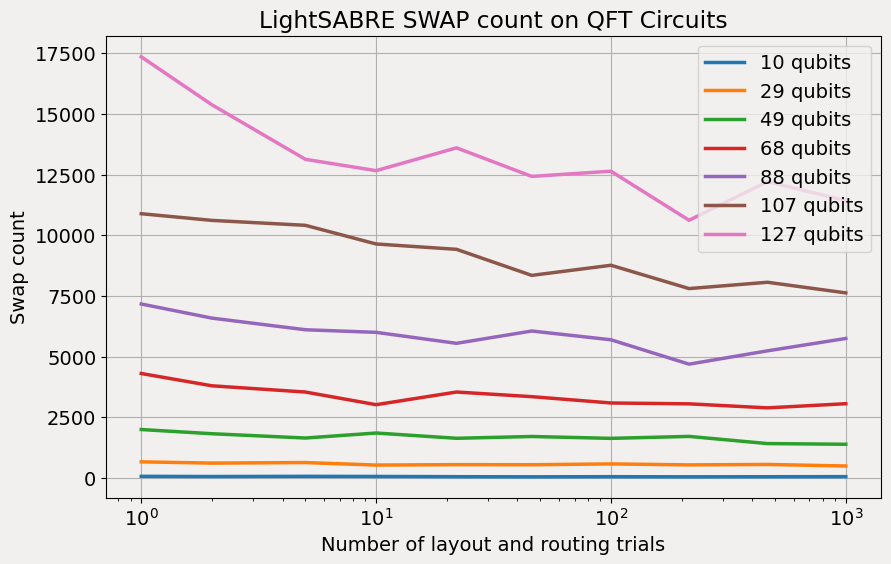

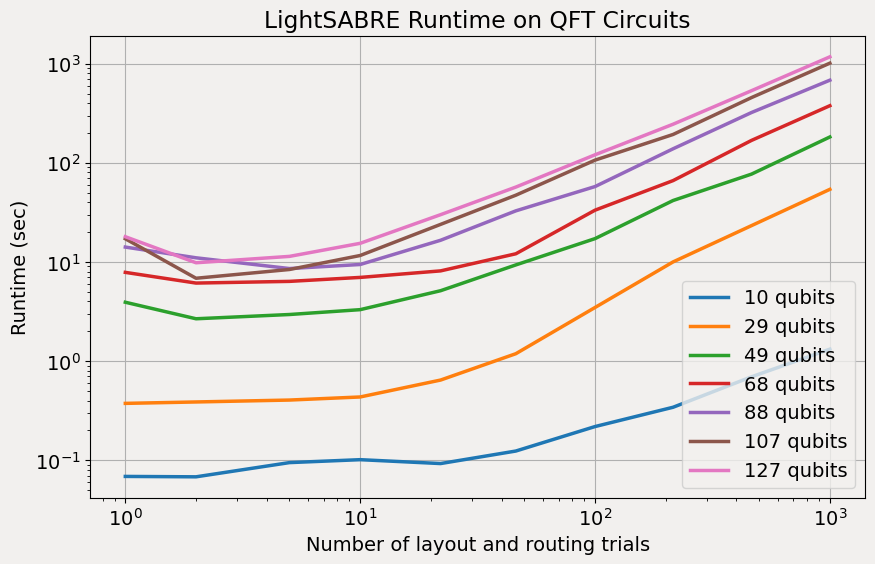

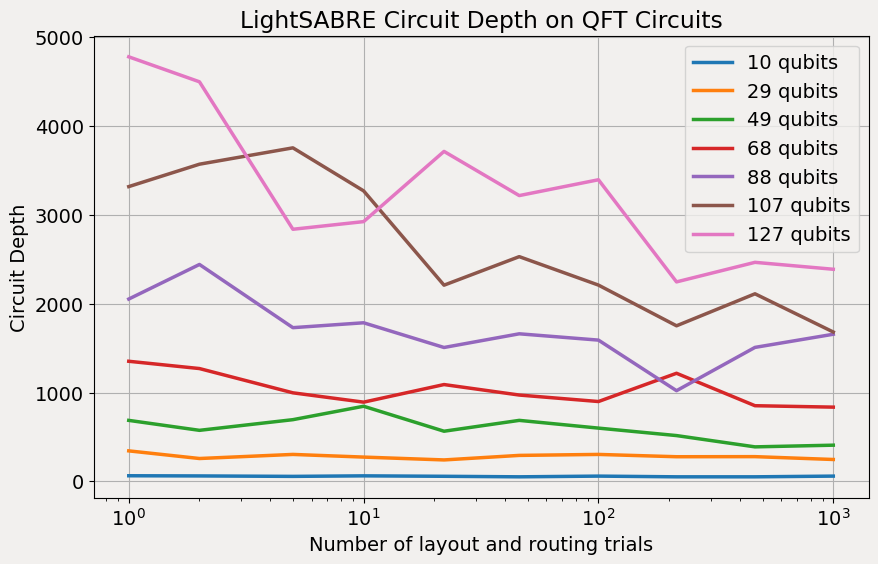

In [16]:
import matplotlib.pyplot as plt
# Set background color

background_color = '#F2F0EE'  # Light gray color
plt.rcParams.update({'font.size': 14})

# Plot Swap Count vs Layout Trials
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(background_color)  # Set figure background color
ax.set_facecolor(background_color)         # Set axes background color
for q in num_qubits:
    ax.plot(layout_trials, swap_counts[q], label=f'{q} qubits', linewidth=2.5)  # Increased linewidth
ax.set_xscale('log')
ax.set_xlabel('Number of layout and routing trials')
ax.set_ylabel('Swap count')
ax.set_title('LightSABRE SWAP count on QFT Circuits')
legend = ax.legend(facecolor=background_color)  # Set legend background color
ax.grid(True)
plt.savefig(f'graphs/{graph_type}_swap_count_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to reset settings

# Plot Runtime vs Layout Trials
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(background_color)  # Set figure background color
ax.set_facecolor(background_color)         # Set axes background color
for q in num_qubits:
    ax.plot(layout_trials, runtimes[q], label=f'{q} qubits', linewidth=2.5)  # Increased linewidth
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of layout and routing trials')
ax.set_ylabel('Runtime (sec)')
ax.set_title('LightSABRE Runtime on QFT Circuits')
legend = ax.legend(facecolor=background_color)  # Set legend background color
ax.grid(True)
plt.savefig(f'graphs/{graph_type}_runtime_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to reset settings

# Plot Depth vs Layout Trials
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(background_color)  # Set figure background color
ax.set_facecolor(background_color)         # Set axes background color
for q in num_qubits:
    ax.plot(layout_trials, depths[q], label=f'{q} qubits', linewidth=2.5)  # Increased linewidth
ax.set_xscale('log')
ax.set_xlabel('Number of layout and routing trials')
ax.set_ylabel('Circuit Depth')
ax.set_title('LightSABRE Circuit Depth on QFT Circuits')
legend = ax.legend(facecolor=background_color)  # Set legend background color
ax.grid(True)
plt.savefig(f'graphs/{graph_type}_depth_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to reset settings